In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pylab
import os
import sklearn as sklearn
import math
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from itertools import product
from sklearn.metrics import precision_recall_curve
from scipy.stats.stats import pearsonr
from sklearn.datasets import make_hastie_10_2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn import preprocessing
%matplotlib inline

In [466]:
os.chdir("/Users/carolineroper/Documents/School/Machine Learning/Reset_Project/noda")
import project_env as pe
import error_analysis as ea

In [736]:
train = pd.read_csv('train_pj.csv')
val = pd.read_csv('val_pj.csv')
test = pd.read_csv('test_pj.csv')

### Investigating Missing Values Over Time

In [696]:
data_simple = pd.read_csv('data_processing/output/data_simple.csv')

In [697]:
data_simple.isnull().sum()

UNIQUE_ID                      0
ADA_CODE                   27237
ADD_DATE                       4
ARREST_CREDIT_CODE         10878
ARREST_DATE                    4
BAR_ADMISSION              30887
BOFI_NBR                       1
CHARGE_CLASS                4602
CHARGE_TYPE                  581
CRIMINAL_FLAG                  0
DFDN_SEQ_NBR                   0
DOB                            0
FBI_NBR                   172823
FINAL_DETENTION_FLAG           4
HABITUAL_OFFENDER_FLAG     60732
INITIAL_DETENTION_FLAG     15469
JUVENILE_FLAG                  0
LEAD_CHARGE_CODE             552
PARTY                      56195
POLICE_RPT_DATE                0
POLICE_RPT_DAYS                0
RACE                        4821
SADA_DOB                   36432
SADA_RACE                  38901
SADA_SEX                   28992
SCREENING_DAYS                 0
SCREENING_DISP_CODE        35515
SCREENING_DISP_DATE            0
SEX                         4775
SYS_NBR                        0
dtype: int

In [698]:
cols_can_be_NA = ['ADA_CODE', 'ARREST_CREDIT_CODE', 'BAR_ADMISSION', 'SCREENING_DISP_CODE', 'CHARGE_CLASS', \
                  'CHARGE_TYPE', 'HABITUAL_OFFENDER_FLAG', 'INITIAL_DETENTION_FLAG', 'LEAD_CHARGE_CODE', 'PARTY', \
                  'RACE', 'SADA_DOB', 'SADA_SEX', 'SEX', 'SADA_RACE']

In [699]:
data_simple['YEAR'] = data_simple.ARREST_DATE.astype(str).str.slice(0,4)

In [700]:
year_nums = np.arange(1988,2000).astype(str)

In [701]:
years = list(year_nums)

data_simple = data_simple[data_simple['YEAR'].isin(years)]

na_counts = pd.DataFrame(columns = cols_can_be_NA, index = years)

In [704]:
for year in years:
    row = np.array(data_simple[data_simple['YEAR'] == year][cols_can_be_NA].isnull().sum())
    df = pd.DataFrame(data = list(zip(cols_can_be_NA, row)))
    df.index = df[0]
    series = pd.Series(df[1].to_dict())
    na_counts.loc[year] = series

In [705]:
na_counts

,ADA_CODE,ARREST_CREDIT_CODE,BAR_ADMISSION,SCREENING_DISP_CODE,CHARGE_CLASS,CHARGE_TYPE,HABITUAL_OFFENDER_FLAG,INITIAL_DETENTION_FLAG,LEAD_CHARGE_CODE,PARTY,RACE,SADA_DOB,SADA_SEX,SEX,SADA_RACE
1988,1403,327,1897,1393,100,0,34,0,1,3758,95,2365,1537,95,2372
1989,3129,797,4003,3017,755,0,40,3,0,9562,612,5223,3557,612,6317
1990,4135,1792,5598,3965,1133,0,36,0,0,12051,794,6859,4770,794,6055
1991,3928,1932,3929,3776,631,0,59,0,0,8073,672,5467,4034,672,6560
1992,3704,724,3704,3047,399,24,155,0,2,5126,280,5062,3706,279,5072
1993,35,170,35,1620,350,2,1928,0,1,1526,34,108,107,34,115
1994,253,170,254,1564,190,53,3345,2,52,3196,10,332,331,11,363
1995,985,150,986,1788,88,34,10378,1,34,2002,12,985,985,7,1034
1996,864,52,869,1792,94,53,9860,1,53,937,26,870,865,11,933
1997,1066,82,1069,2344,350,284,12226,33,284,1135,37,1068,1067,36,1136


In [706]:
data_simple['Count'] = 1

In [707]:
na_counts.sort_index(inplace=True)

In [708]:
na_counts['Total_Nulls'] = na_counts.sum(axis=1)

In [709]:
na_counts['Total_Records'] = pd.pivot_table(data = data_simple, values = 'Count', index = 'YEAR', aggfunc=sum)

na_counts['Total_Values'] = na_counts['Total_Records']*len(cols_can_be_NA)

na_counts['Percent Null'] = na_counts['Total_Nulls']/na_counts['Total_Values']

In [710]:
na_counts.index = na_counts.index.map(int)

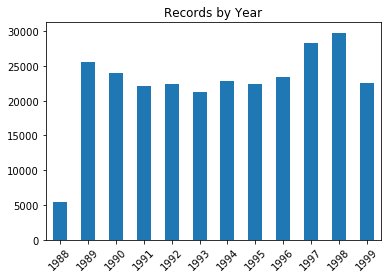

In [711]:
na_counts['Total_Records'].plot(kind = 'bar', title = "Records by Year", rot=45)
plt.savefig('Records_by_Year.png')

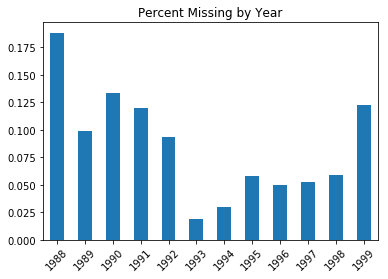

In [712]:
na_counts['Percent Null'].plot(kind = 'bar', title = "Percent Missing by Year", rot=45)
plt.savefig('Percent_Missing_Yr.png')

In [713]:
na_counts['Percent Screening Disp Code Null'] = na_counts["SCREENING_DISP_CODE"].divide(na_counts["Total_Records"])

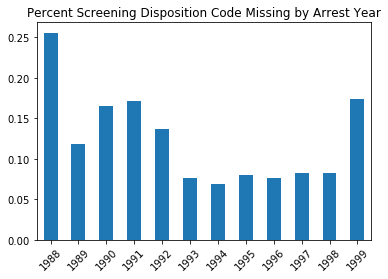

In [714]:
na_counts['Percent Screening Disp Code Null'].plot(kind = 'bar', \
                                                   title = "Percent Screening Disposition Code Missing by Arrest Year",\
                                                  rot=45)
plt.savefig('Pct_Missing_ScrDCode_yr.png')

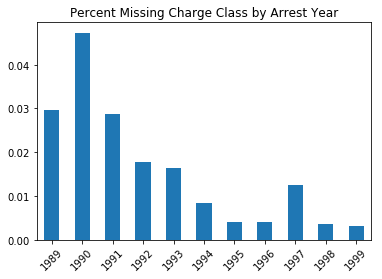

In [617]:
na_counts['Percent Charge Class Null'] = na_counts["CHARGE_CLASS"]/na_counts['Total_Records']
na_counts['Percent Charge Class Null'].plot(kind='bar', title = "Percent Missing Charge Class by Arrest Year", rot=45)
plt.savefig('Pct_Missing_Charge_Code_yr.png')

### Plotting Trends Over Time

In [199]:
#Read in the pre-encoding versions of the data as well

train_og = pd.read_csv('data_train_pj.csv')

In [207]:
train_og['Count'] = 1

In [412]:
by_sc_disp_date = pd.pivot_table(data = train_og, index = 'SCREENING_DISP_DATE_y', \
           columns = 'ACCEPTED', \
              values = 'Count', aggfunc=sum, dropna=False) 

In [414]:
by_sc_disp_date

,Not Accepted,Accepted
SCREENING_DISP_DATE_y,,
1987.0,2.0,NaN
1988.0,1183.0,1154.0
1989.0,7481.0,5751.0
1990.0,9669.0,3268.0
1991.0,7349.0,5000.0
1992.0,6586.0,5594.0
1993.0,5057.0,6464.0
1994.0,5847.0,6250.0
1995.0,4991.0,6493.0


In [415]:
by_sc_disp_date.columns = ['Not Accepted', 'Accepted']

by_sc_disp_date['Total'] = by_sc_disp_date['Not Accepted'] + by_sc_disp_date['Accepted']

by_sc_disp_date['Percent'] = by_sc_disp_date['Accepted']/by_sc_disp_date['Total']

In [385]:
train_og.shape #everything based on train_og is based on the original dataset that has the juveniles in it.

(147663, 30)

In [420]:
by_sc_disp_date.index = by_sc_disp_date.index.map(int)

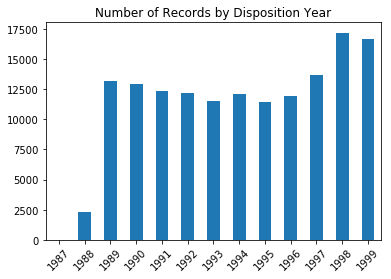

In [463]:
by_sc_disp_date['Total'].plot(kind = 'bar', title = "Number of Records by Disposition Year", rot = 45)
plt.savefig("Dispositions_per_yr.png")

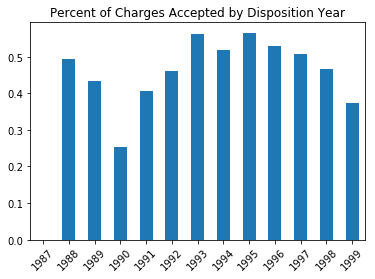

In [422]:
by_sc_disp_date['Percent'].plot(kind = 'bar', title = "Percent of Charges Accepted by Disposition Year", rot = 45)
plt.savefig("Charges_accepted_per_yr.png")

### Plotting % Accepted by Charge Type

In [228]:
train_og.columns

Index(['UNIQUE_ID', 'NEXT_ARREST_TIME', 'ARREST_DATE', 'ARREST_DATE_y',
       'BOFI_NBR', 'SCREENING_DISP_CODE', 'BAR_ADMIT_DAYS', 'CRIMINAL_FLAG',
       'FINAL_DETENTION_FLAG', 'HABITUAL_OFFENDER_FLAG',
       'INITIAL_DETENTION_FLAG', 'JUVENILE_FLAG', 'SADA_SEX', 'SEX',
       'TOT_NUM_DEF', 'MULTIPLE_DEF_FLAG', 'SCREENING_DAYS',
       'SCREENING_DISP_DATE_y', 'SCREENING_DISP_DATE_m', 'AGE',
       'ARREST_TO_SCREEN', 'CHARGE_CLASS', 'CHARGE_TYPE', 'PARTY', 'RACE',
       'SADA_RACE', 'AGE_JUV_INVALID', 'AGE_NA', 'ACCEPTED', 'Count'],
      dtype='object')

In [237]:
by_charge_type = pd.pivot_table(data = train_og, index = 'CHARGE_TYPE', \
           columns = 'ACCEPTED', \
        values = 'Count', aggfunc=sum, dropna=False)

In [239]:
by_charge_type.columns = ['Not Accepted', 'Accepted']

by_charge_type['Total'] = by_charge_type['Not Accepted'] + by_charge_type['Accepted']

by_charge_type['Percent'] = by_charge_type['Accepted']/by_charge_type['Total']

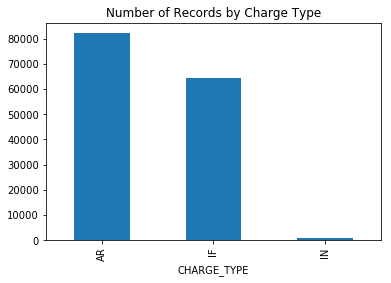

In [409]:
by_charge_type['Total'].plot(kind='bar', title = 'Number of Records by Charge Type')
plt.savefig("Records_by_charge_type.png")

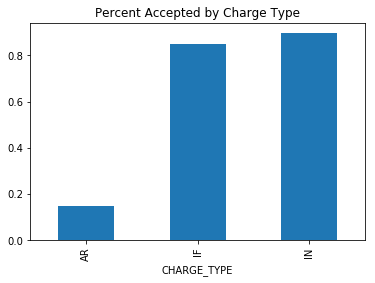

In [410]:
by_charge_type['Percent'].plot(kind='bar', title = 'Percent Accepted by Charge Type')
plt.savefig("Percent_accepted_by_charge_type.png")

In [451]:
by_charge_type

,Not Accepted,Accepted,Total,Percent
CHARGE_TYPE,,,,
AR,70103,12066,82169,0.146844
IF,9731,54469,64200,0.848427
IN,101,876,977,0.896622


### Removing Juveniles

In [737]:
train.head()

,UNIQUE_ID,NEXT_ARREST_TIME,ARREST_DATE,ARREST_DATE_y,BOFI_NBR,SCREENING_DISP_CODE,BAR_ADMIT_DAYS,CRIMINAL_FLAG,FINAL_DETENTION_FLAG,HABITUAL_OFFENDER_FLAG,...,ARREST_DATE_y_1990.0,ARREST_DATE_y_1991.0,ARREST_DATE_y_1992.0,ARREST_DATE_y_1993.0,ARREST_DATE_y_1994.0,ARREST_DATE_y_1995.0,ARREST_DATE_y_1996.0,ARREST_DATE_y_1997.0,ARREST_DATE_y_1998.0,ARREST_DATE_y_1999.0
0,31781,1163,1989-03-20,1989.0,300859,240.0,537,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,217249,0,1996-05-28,1996.0,Y100989,240.0,1131,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,181115,0,1994-08-20,1994.0,343892,260.0,1415,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,187502,716,1997-03-25,1997.0,J98484,260.0,1992,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,87666,29,1997-02-13,1997.0,312235,260.0,3597,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [740]:
train = train[train['JUVENILE_FLAG'] == 0]

val = val[val['JUVENILE_FLAG']==0]

print (val.shape)

print (train.shape)

(26993, 250)
(108856, 250)


### Removing 1988

In [741]:
train = train[train['ARREST_DATE_y'] != 1988]

val = val[val['ARREST_DATE_y'] != 1988]

print (val.shape)
print (train.shape)

(26337, 250)
(106239, 250)


# Target Variable

In [742]:
#target variable of whether any charges were accepted

X_train = train.drop('ACCEPTED', axis=1)
y_train = train['ACCEPTED']
X_val = val.drop('ACCEPTED', axis = 1)
y_val = val['ACCEPTED']
X_test = test.drop('ACCEPTED', axis = 1)
y_test = test['ACCEPTED']

In [743]:
unique, counts = np.unique(y_train, return_counts = True)
percent = counts[1]/counts.sum()
print('Training: %s percent were charged.' %(percent*100))

unique, counts = np.unique(y_val, return_counts = True)
percent = counts[1]/counts.sum()
print('Test: %s percent were charged.' %(percent*100))

#percentages went from 45% to 50% after removing juveniles (juveniles probably very rarely charged)

Training: 50.9106825177 percent were charged.
Test: 51.0574476972 percent were charged.


In [744]:
#remove non-feature columns (inc. juvenile flag since this should be 0 for everyone)
X_train=X_train.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME', 'JUVENILE_FLAG'], axis=1)
X_val=X_val.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME', 'JUVENILE_FLAG'], axis=1)

#Using year and month as predictive variables (why did we take these out?)
X_train=X_train.drop(['ARREST_DATE', 'ARREST_DATE_y'], axis=1)
X_val=X_val.drop(['ARREST_DATE','ARREST_DATE_y'], axis=1)

In [745]:
#remove non-feature columns
X_test=X_test.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME', 'JUVENILE_FLAG'], axis=1)

#Using year and month as predictive variables
X_test=X_test.drop(['ARREST_DATE', 'ARREST_DATE_y'], axis=1)

# Gradient Boosted Trees

### Default Model

In [746]:
#now with 250 columns, the model is much slower to train
predicted_prosecutor = GradientBoostingClassifier()

predicted_prosecutor.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [747]:
predictions = predicted_prosecutor.predict(X_val)
predicted_probability = predicted_prosecutor.predict_proba(X_val)

In [748]:
#Accuracy
print ('Accuracy: ', sklearn.metrics.accuracy_score(y_val, predictions))

#Precision
print ('Precision: ', sklearn.metrics.precision_score(y_val, predictions))

#Recall
print ('Recall: ', sklearn.metrics.recall_score(y_val, predictions))

#F-score
print ('F-score: ', sklearn.metrics.f1_score(y_val, predictions))

Accuracy:  0.880472339295
Precision:  0.925121769999
Recall:  0.833345727672
F-score:  0.876838810642


#### Feature Importance

In [749]:
feature_imp = pd.DataFrame(list(zip(X_train.columns, predicted_prosecutor.feature_importances_)))
feature_imp.columns = ['Column Name', 'Importance']
feature_imp = feature_imp.sort(columns = 'Importance', ascending = False)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [750]:
feature_imp.index = feature_imp['Column Name']

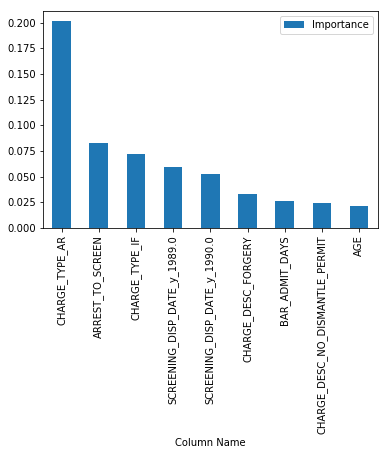

In [759]:
feature_imp[0:9].plot(kind='bar') #some of the new variables turned up in the top 10, although the top variables are still administrative

In [246]:
feature_imp.to_csv('Feature_Importance.csv', index=False)

In [ ]:
#Charge type of AR very predictive
#Screening disp date year of 1989 very predictive (graph % released over time)
#Charge type of IF also very predictive

### Confusion Matrix

array([[18919,  1136],
       [ 2987, 13875]])

### Partial Dependence Plots

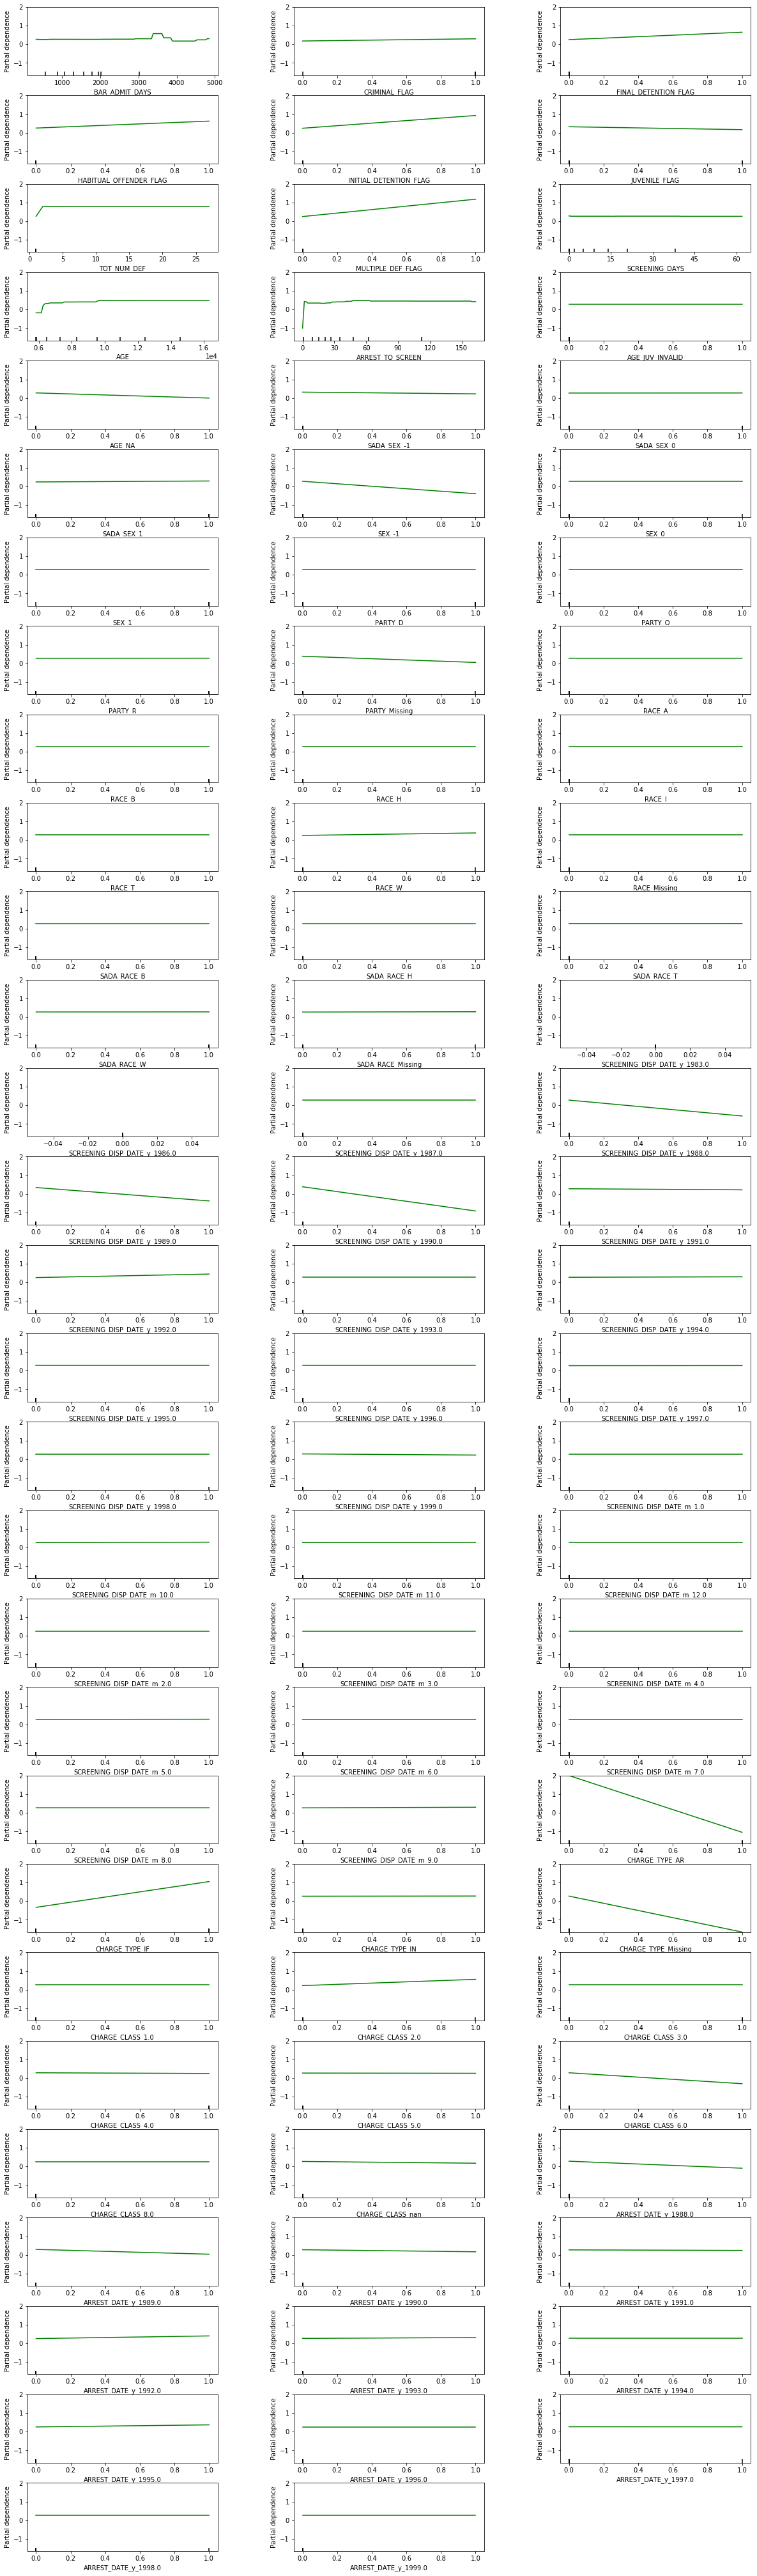

In [15]:
#haven't re-run these after adding the new column

plot_partial_dependence(predicted_prosecutor, X_train, \
                        np.arange(0, len(X_train.columns)), feature_names = list(X_train.columns), label=1)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 100.5)

### Split the model by charge type (AR vs. IF)

In [729]:
train_AR = train[train['CHARGE_TYPE_AR'] == 1]
val_AR = val[val['CHARGE_TYPE_AR'] == 1]
test_AR = test[test['CHARGE_TYPE_AR'] == 1]

train_IF = train[train['CHARGE_TYPE_IF'] == 1]
val_IF = val[val['CHARGE_TYPE_IF'] == 1]
test_IF = test[test['CHARGE_TYPE_IF'] == 1]

X_train_AR = train_AR.drop('ACCEPTED', axis=1)
y_train_AR = train_AR['ACCEPTED']
X_val_AR = val_AR.drop('ACCEPTED', axis = 1)
y_val_AR = val_AR['ACCEPTED']
X_test_AR = test_AR.drop('ACCEPTED', axis = 1)
y_test_AR = test_AR['ACCEPTED']

X_train_IF = train_IF.drop('ACCEPTED', axis=1)
y_train_IF = train_IF['ACCEPTED']
X_val_IF = val_IF.drop('ACCEPTED', axis = 1)
y_val_IF = val_IF['ACCEPTED']
X_test_IF = test_IF.drop('ACCEPTED', axis = 1)
y_test_IF = test_IF['ACCEPTED']

In [752]:
#remove non-feature columns (inc. juvenile flag since this should be 0 for everyone)
X_train_AR=X_train_AR.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME', 'JUVENILE_FLAG'], axis=1)
X_val_AR=X_val_AR.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME', 'JUVENILE_FLAG'], axis=1)

#Using year and month as predictive variables (why did we take these out?)
X_train_AR=X_train_AR.drop(['ARREST_DATE', 'ARREST_DATE_y'], axis=1)
X_val_AR=X_val_AR.drop(['ARREST_DATE','ARREST_DATE_y'], axis=1)

In [767]:
#remove non-feature columns (inc. juvenile flag since this should be 0 for everyone)
X_train_IF=X_train_IF.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME', 'JUVENILE_FLAG'], axis=1)
X_val_IF=X_val_IF.drop(['BOFI_NBR','SCREENING_DISP_CODE','UNIQUE_ID','NEXT_ARREST_TIME', 'JUVENILE_FLAG'], axis=1)

#Using year and month as predictive variables (why did we take these out?)
X_train_IF=X_train_IF.drop(['ARREST_DATE', 'ARREST_DATE_y'], axis=1)
X_val_IF=X_val_IF.drop(['ARREST_DATE','ARREST_DATE_y'], axis=1)

#### The AR Version

In [ ]:
predicted_prosecutor_AR = GradientBoostingClassifier()

predicted_prosecutor_AR.fit(X_train_AR,y_train_AR)

In [774]:
predictions_AR = predicted_prosecutor_AR.predict(X_val_AR)
predicted_probability_AR = predicted_prosecutor_AR.predict_proba(X_val_AR)

In [753]:
feature_imp_AR = pd.DataFrame(list(zip(X_train_AR.columns, predicted_prosecutor_AR.feature_importances_)))
feature_imp_AR.columns = ['Column Name', 'Importance']
feature_imp_AR = feature_imp_AR.sort(columns = 'Importance', ascending = False)

feature_imp_AR.index = feature_imp_AR['Column Name']

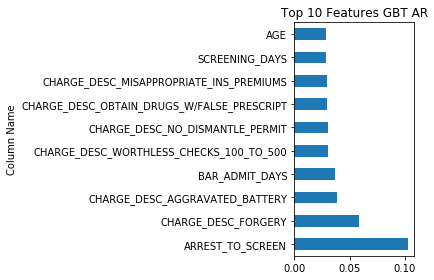

In [814]:
feature_imp_AR[0:10].plot(kind='barh', title = 'Top 10 Features GBT AR', legend=None)
plt.tight_layout()
plt.savefig('AR_Feature_Importance.png')

In [772]:
predictions_AR.shape

(26337,)

In [773]:
y_val_AR.shape

(14161,)

In [775]:
#Accuracy
print ('Accuracy: ', sklearn.metrics.accuracy_score(y_val_AR, predictions_AR))

#Precision
print ('Precision: ', sklearn.metrics.precision_score(y_val_AR, predictions_AR))

#Recall
print ('Recall: ', sklearn.metrics.recall_score(y_val_AR, predictions_AR))

#F-score
print ('F-score: ', sklearn.metrics.f1_score(y_val_AR, predictions_AR))

Accuracy:  0.84542052115
Precision:  0.785536159601
Recall:  0.130272952854
F-score:  0.223483504789


#### The IF Version

In [ ]:
predicted_prosecutor_IF = GradientBoostingClassifier()

predicted_prosecutor_IF.fit(X_train_IF,y_train_IF)

In [776]:
predictions_IF = predicted_prosecutor_IF.predict(X_val_IF)
predicted_probability_IF = predicted_prosecutor_IF.predict_proba(X_val_IF)

In [768]:
feature_imp_IF = pd.DataFrame(list(zip(X_train_IF.columns, predicted_prosecutor_IF.feature_importances_)))
feature_imp_IF.columns = ['Column Name', 'Importance']
feature_imp_IF = feature_imp_IF.sort(columns = 'Importance', ascending = False)

feature_imp_IF.index = feature_imp_IF['Column Name']

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


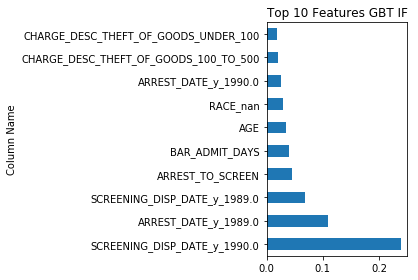

In [815]:
feature_imp_IF[0:10].plot(kind='barh', title = 'Top 10 Features GBT IF', legend =None)
plt.tight_layout()
plt.savefig('IF_Feature_Importance.png')

In [777]:
#Accuracy
print ('Accuracy: ', sklearn.metrics.accuracy_score(y_val_IF, predictions_IF))

#Precision
print ('Precision: ', sklearn.metrics.precision_score(y_val_IF, predictions_IF))

#Recall
print ('Recall: ', sklearn.metrics.recall_score(y_val_IF, predictions_IF))

#F-score
print ('F-score: ', sklearn.metrics.f1_score(y_val_IF, predictions_IF))

Accuracy:  0.936311141304
Precision:  0.93944181148
Recall:  0.994425863991
F-score:  0.9661521798


In [ ]:
#My old code was plotting the first 5 variables and assigning different names to them.
#Charge_TYPE_AR means it's less likely that charges will be accepted.
#Charge_type_IN makes it more likely that charges will be accepted.
#Arrest to screen, if it's more than a day, makes it more likely that charges will be accepted.
#Charges are less likely to be accepted if the disp date is 1989, 1990, 1988. The other years look positive or flat.
#Age makes it more likely that charges will be accepted, but it has a sharp increase at first and then slows
#(Age is in days, partial dependence plateaus at 7,000 days, which is around 19 years old.)

### Logistic Regression Version

In [442]:
X_train_lr = preprocessing.scale(X_train)

In [443]:
predicted_prosecutor_lr = LogisticRegression()

In [444]:
predicted_prosecutor_lr.fit(X_train_lr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [445]:
X_val_lr = preprocessing.scale(X_val)

In [446]:
predictions_lr = predicted_prosecutor_lr.predict(X_val_lr)
predicted_probability_lr = predicted_prosecutor_lr.predict_proba(X_val_lr)

In [447]:
lr_cm = sklearn.metrics.confusion_matrix(y_val,predictions_lr)
lr_cm

array([[12006,  1252],
       [ 2279, 11456]])

In [27]:
gbt_cm #for comparison

array([[18919,  1136],
       [ 2987, 13875]])

In [30]:
#do both models classify the same datapoints the same way?

model_comparison_cm = sklearn.metrics.confusion_matrix(predictions, predictions_lr)

model_comparison_cm

array([[21580,   326],
       [  283, 14728]])

In [147]:
#Accuracy
print ('Accuracy: ', sklearn.metrics.accuracy_score(y_val, predictions_lr))

#Precision
print ('Precision: ', sklearn.metrics.precision_score(y_val, predictions_lr))

#Recall
print ('Recall: ', sklearn.metrics.recall_score(y_val, predictions_lr))

#F-score
print ('F-score: ', sklearn.metrics.f1_score(y_val, predictions_lr))

#Recall is close, precision isn't quite as good


Accuracy:  0.880055259095
Precision:  0.912979938887
Recall:  0.815087178271
F-score:  0.861260809625


In [448]:
#Coefficients

coefficients = pd.DataFrame(list(zip(np.ravel(predicted_prosecutor_lr.coef_), X_train.columns)))

coefficients = coefficients.rename(columns = {0:'coefficient', 1:'feature'})


In [461]:
imp_features = ['CHARGE_TYPE_AR', 'ARREST_TO_SCREEN', 'SCREENING_DISP_DATE_y_1989.0', 'AGE', 'CHARGE_TYPE_IF']

In [462]:
coefficients.loc[coefficients.feature.isin(imp_features), ]

,coefficient,feature,coefficient_abs_val
8,0.058250,AGE,0.058250
9,-0.072040,ARREST_TO_SCREEN,0.072040
38,-0.406988,SCREENING_DISP_DATE_y_1989.0,0.406988
61,-1.230846,CHARGE_TYPE_AR,1.230846
62,1.186275,CHARGE_TYPE_IF,1.186275


In [ ]:
# The LR agrees directionally on all but ARREST_TO_SCREEN

In [449]:
coefficients['coefficient_abs_val'] = abs(coefficients['coefficient'])

In [450]:
coefficients.sort(columns = 'coefficient_abs_val', ascending=False) #I like that habitual offender flag is now in the top
#this might be easier to arrive at a causal story for

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,coefficient,feature,coefficient_abs_val
61,-1.230846,CHARGE_TYPE_AR,1.230846
62,1.186275,CHARGE_TYPE_IF,1.186275
3,0.474326,HABITUAL_OFFENDER_FLAG,0.474326
38,-0.406988,SCREENING_DISP_DATE_y_1989.0,0.406988
15,-0.387670,SEX_-1,0.387670
156,-0.347035,CHARGE_DESC_IN_NEED_OF_SUPERVISION,0.347035
41,0.333743,SCREENING_DISP_DATE_y_1992.0,0.333743
39,-0.311762,SCREENING_DISP_DATE_y_1990.0,0.311762
40,0.308587,SCREENING_DISP_DATE_y_1991.0,0.308587
37,-0.307524,SCREENING_DISP_DATE_y_1988.0,0.307524


### Splitting AR and IF of the Logreg

#### AR

In [778]:
X_train_lr_AR = preprocessing.scale(X_train_AR)

predicted_prosecutor_lr_AR = LogisticRegression()
predicted_prosecutor_lr_AR.fit(X_train_lr_AR, y_train_AR)

X_val_lr_AR = preprocessing.scale(X_val_AR)

predictions_lr_AR = predicted_prosecutor_lr_AR.predict(X_val_lr_AR)
predicted_probability_lr_AR = predicted_prosecutor_lr_AR.predict_proba(X_val_lr_AR)

In [784]:
#Accuracy
print ('Accuracy: ', sklearn.metrics.accuracy_score(y_val_AR, predictions_lr_AR))

#Precision
print ('Precision: ', sklearn.metrics.precision_score(y_val_AR, predictions_lr_AR))

#Recall
print ('Recall: ', sklearn.metrics.recall_score(y_val_AR, predictions_lr_AR))

#F-score
print ('F-score: ', sklearn.metrics.f1_score(y_val_AR, predictions_lr_AR))

Accuracy:  0.840547983899
Precision:  0.6393728223
Recall:  0.151778329198
F-score:  0.245320855615


In [786]:
lr_cm_AR = sklearn.metrics.confusion_matrix(y_val_AR,predictions_lr_AR)
lr_cm_AR

array([[11536,   207],
       [ 2051,   367]])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


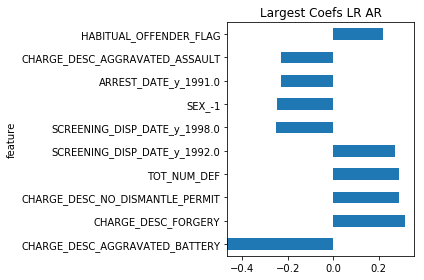

In [820]:
coefficients_AR = pd.DataFrame(list(zip(np.ravel(predicted_prosecutor_lr_AR.coef_), X_train_AR.columns)))

coefficients_AR = coefficients_AR.rename(columns = {0:'coefficient', 1:'feature'})

coefficients_AR['coefficient_abs_val'] = abs(coefficients_AR['coefficient'])

coefficients_AR.index = coefficients_AR['feature']

coefficients_AR.sort(columns = 'coefficient_abs_val', ascending=False).\
iloc[0:10,0:2].plot(kind='barh', title='Largest Coefs LR AR', legend=None)
plt.tight_layout()
plt.savefig('Importance_LR_AR.png')

### IF

In [801]:
X_train_lr_IF = preprocessing.scale(X_train_IF)

predicted_prosecutor_lr_IF = LogisticRegression()
predicted_prosecutor_lr_IF.fit(X_train_lr_IF, y_train_IF)

X_val_lr_IF = preprocessing.scale(X_val_IF)

predictions_lr_IF = predicted_prosecutor_lr_IF.predict(X_val_lr_IF)
predicted_probability_lr_IF = predicted_prosecutor_lr_IF.predict_proba(X_val_lr_IF)

In [802]:
#Accuracy
print ('Accuracy: ', sklearn.metrics.accuracy_score(y_val_IF, predictions_lr_IF))

#Precision
print ('Precision: ', sklearn.metrics.precision_score(y_val_IF, predictions_lr_IF))

#Recall
print ('Recall: ', sklearn.metrics.recall_score(y_val_IF, predictions_lr_IF))

#F-score
print ('F-score: ', sklearn.metrics.f1_score(y_val_IF, predictions_lr_IF))

Accuracy:  0.936396059783
Precision:  0.951410799603
Recall:  0.980490523969
F-score:  0.965731802169


In [ ]:
coefficients_IF = pd.DataFrame(list(zip(np.ravel(predicted_prosecutor_lr_IF.coef_), X_train_IF.columns)))

coefficients_IF = coefficients_IF.rename(columns = {0:'coefficient', 1:'feature'})

coefficients_IF['coefficient_abs_val'] = abs(coefficients_IF['coefficient'])

In [806]:
coefficients_IF.columns

Index(['coefficient', 'feature', 'coefficient_abs_val'], dtype='object')

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


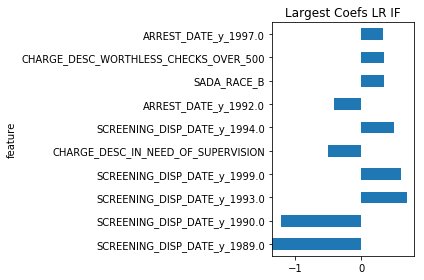

In [822]:
coefficients_IF.index = coefficients_IF['feature']

coefficients_IF.sort(columns = 'coefficient_abs_val', ascending=False).\
iloc[0:10,0:2].plot(kind='barh', title='Largest Coefs LR IF', legend=None)
plt.tight_layout()
plt.savefig('Importance_LR_IF.png')

### Incorporating the Reason

In [53]:
full_dataset = pd.read_csv('data_processing/output/merged_CR.csv',low_memory=False)


In [38]:
full_dataset.head()

,UNIQUE_ID,NEXT_ARREST_TIME,CRIMINAL_FLAG,FINAL_DETENTION_FLAG,HABITUAL_OFFENDER_FLAG,INITIAL_DETENTION_FLAG,JUVENILE_FLAG,SADA_SEX,SEX,TOT_NUM_DEF,...,CHARGE_CLASS,CHARGE_TYPE,LEAD_CHARGE_CODE,PARTY,RACE,SADA_RACE,DFDN_STATUS_REASON_CODE,GUILTY_FLAG,SCREENING_DISP_CODE,BOFI_NBR
0,5184,Delete,0,0,0,0,0,-1,1,1,...,4.0,IF,14:(27) 67.3 (B),NaN,W,NaN,NaN,NaN,NaN,290600
1,5073,3209,1,0,0,0,0,-1,1,1,...,3.0,IF,14:69 (A),NaN,B,NaN,NaN,NaN,NaN,290588
2,104025,1794,1,0,0,0,0,-1,1,1,...,3.0,IF,14:67 (A),NaN,B,NaN,NaN,NaN,NaN,220453
3,18252,516,0,0,0,0,1,0,1,1,...,3.0,IF,14:69 (A),NaN,B,W,NaN,NaN,230.0,J78755
4,5183,0,0,0,0,0,0,-1,1,1,...,4.0,IF,40:966 (D) (1),NaN,W,NaN,NaN,NaN,NaN,290600


In [41]:
train.head()

,UNIQUE_ID,NEXT_ARREST_TIME,ARREST_DATE,ARREST_DATE_y,BOFI_NBR,SCREENING_DISP_CODE,BAR_ADMIT_DAYS,CRIMINAL_FLAG,FINAL_DETENTION_FLAG,HABITUAL_OFFENDER_FLAG,...,ARREST_DATE_y_1990.0,ARREST_DATE_y_1991.0,ARREST_DATE_y_1992.0,ARREST_DATE_y_1993.0,ARREST_DATE_y_1994.0,ARREST_DATE_y_1995.0,ARREST_DATE_y_1996.0,ARREST_DATE_y_1997.0,ARREST_DATE_y_1998.0,ARREST_DATE_y_1999.0
0,31781,1163,1989-03-20,1989.0,300859,240.0,537,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,217249,0,1996-05-28,1996.0,Y100989,240.0,1131,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,181115,0,1994-08-20,1994.0,343892,260.0,1415,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,187502,716,1997-03-25,1997.0,J98484,260.0,1992,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,87666,29,1997-02-13,1997.0,312235,260.0,3597,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
full_dataset.columns

Index(['UNIQUE_ID', 'NEXT_ARREST_TIME', 'CRIMINAL_FLAG',
       'FINAL_DETENTION_FLAG', 'HABITUAL_OFFENDER_FLAG',
       'INITIAL_DETENTION_FLAG', 'JUVENILE_FLAG', 'SADA_SEX', 'SEX',
       'TOT_NUM_DEF', 'MULTIPLE_DEF_FLAG', 'SCREENING_DAYS', 'POLICE_RPT_DAYS',
       'POLICE_RPT_DATE', 'ARREST_DATE', 'DOB', 'SCREENING_DISP_DATE',
       'BAR_ADMISSION', 'POLICE_RPT_DATE_y', 'ARREST_DATE_y', 'DOB_y',
       'SCREENING_DISP_DATE_y', 'BAR_ADMISSION_y', 'POLICE_RPT_DATE_m',
       'ARREST_DATE_m', 'DOB_m', 'SCREENING_DISP_DATE_m', 'BAR_ADMISSION_m',
       'AGE', 'BAR_ADMIT_DAYS', 'ARREST_TO_SCREEN', 'AGE_NA',
       'AGE_JUV_INVALID', 'ARREST_CREDIT_CODE', 'CHARGE_CLASS', 'CHARGE_TYPE',
       'LEAD_CHARGE_CODE', 'PARTY', 'RACE', 'SADA_RACE',
       'DFDN_STATUS_REASON_CODE', 'GUILTY_FLAG', 'SCREENING_DISP_CODE',
       'BOFI_NBR'],
      dtype='object')

In [47]:
train_reason = pd.merge(train, full_dataset.loc[:,['UNIQUE_ID', 'DFDN_STATUS_REASON_CODE']], on = "UNIQUE_ID")

In [55]:
Code = pd.read_stata("data_processing/source/code-cln.dta")
REASCD = Code[Code['code_type'] == 'REASCD']
train_reason['DFDN_STATUS_REASON_CODE'] =\
train_reason['DFDN_STATUS_REASON_CODE'].astype(str)
train_reason['DFDN_STATUS_REASON_CODE'] = \
train_reason['DFDN_STATUS_REASON_CODE'].str.split(".").apply(lambda x: x[0])
train_reason.DFDN_STATUS_REASON_CODE =\
train_reason.DFDN_STATUS_REASON_CODE.apply(lambda x: x.zfill(3))

REASCD['code_code'] = REASCD['code_code'].astype(str)

train_reason = pd.merge(train_reason, REASCD[['code_code', 'short_desc', 'long_desc']], \
                             left_on=['DFDN_STATUS_REASON_CODE'], right_on=['code_code'], how='left')

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
train_reason.shape

(147663, 98)

In [99]:
train_reason['long_desc'].value_counts(dropna=False).head()

NaN                               42749
NOT APPLICABLE                    38725
REFERRAL TO FINS -JUVENILE        12422
VICTIM REFUSES TO PROSECUTE        9872
DEFENDANT SEVERED/CONSOLIDATED     6772
Name: long_desc, dtype: int64

In [104]:
train_reason.loc[train_reason.ACCEPTED == 0, 'long_desc'].value_counts(dropna=False).head()

NaN                                23459
REFERRAL TO FINS -JUVENILE         12360
VICTIM REFUSES TO PROSECUTE         9639
TESTIMONY INSUFF TO PROVE CRIME     5404
NOT SUITABLE FOR PROSECUTION        4817
Name: long_desc, dtype: int64

In [106]:
train_reason.loc[train_reason.ACCEPTED == 0].shape

(80217, 98)

In [59]:
train_reason['Count'] = 1

In [158]:
reasons = pd.pivot_table(data = train_reason, values ='Count', index = train_reason['long_desc'], \
               columns = train_reason['ACCEPTED'], aggfunc = sum, dropna=False)

In [159]:
sum(reasons.loc[reasons[0].notnull(), 0]) + sum(reasons.loc[reasons[1].notnull(), 1])

104914.0

In [138]:
reasons0 = reasons[0].div(sum(reasons.loc[reasons[0].notnull(), 0]))

reasons1 = reasons[1].div(sum(reasons.loc[reasons[1].notnull(), 1]))

reasons['Pct_of_not_accepted']  = reasons0

reasons['Pct_of_accepted'] = reasons1


In [152]:
reasons = reasons.rename(columns = {0: 'not_accepted_num', 1: 'accepted_num'})

In [153]:
reasons.sort_values(by='Pct_of_not_accepted', ascending = False).head()

ACCEPTED,not_accepted_num,accepted_num,Pct_of_not_accepted,Pct_of_accepted
long_desc,,,,
REFERRAL TO FINS -JUVENILE,12360.0,62.0,0.217767,0.001287
VICTIM REFUSES TO PROSECUTE,9639.0,233.0,0.169826,0.004838
TESTIMONY INSUFF TO PROVE CRIME,5404.0,358.0,0.095211,0.007434
NOT SUITABLE FOR PROSECUTION,4817.0,100.0,0.084869,0.002077
INSUFFICIENT NEXUS,4743.0,99.0,0.083565,0.002056


In [154]:
sum(reasons.loc[reasons['not_accepted_num'].notnull(),'not_accepted_num'])

56758.0

In [155]:
sum(reasons.loc[reasons['accepted_num'].notnull(),'accepted_num'])

48156.0

### Error Analysis

In [ ]:
#Haven't yet adapted code below to the predicted prosecutor model

In [9]:
#preds_to_analyze = models_predict_val['Model59']

preds_to_analyze = best_model_predictions

np.save('pred_val_5yr_gbt_optimal.npy', preds_to_analyze)

In [10]:
probs_to_analyze = best_model_predicted_prob

In [11]:
val['AGE'] = val['AGE']/365

In [9]:
numeric = ['NEXT_ARREST_TIME','ARREST_DATE_y', 'BAR_ADMIT_DAYS', 'CRIMINAL_FLAG','FINAL_DETENTION_FLAG',\
           'HABITUAL_OFFENDER_FLAG','INITIAL_DETENTION_FLAG','JUVENILE_FLAG','TOT_NUM_DEF','MULTIPLE_DEF_FLAG',\
           'SCREENING_DAYS','ARREST_DATE_y','AGE', 'AGE_JUV_INVALID', 'AGE_NA', 'ARREST_TO_SCREEN']

numeric_exc_binary = ['NEXT_ARREST_TIME','ARREST_DATE_y','SCREENING_DAYS','SCREENING_DISP_DATE_y',\
                      'SCREENING_DISP_DATE_m','AGE']

categorical =['CHARGE_TYPE',\
       'PARTY', 'RACE', 'SADA_RACE','SEX','SADA_SEX']

categorical_and_binary = ['CHARGE_CLASS', 'CHARGE_TYPE',\
       'PARTY', 'RACE', 'SADA_RACE','SEX','SADA_SEX', 'CRIMINAL_FLAG',\
        'JUVENILE_FLAG', 'MULTIPLE_DEF_FLAG', 'AGE_JUV_INVALID', 'AGE_NA']

In [10]:
val_error = ea.Error_Analysis('5_yr_gbt_optimal', 'data_processing/output/data_val.csv', \
                              'pred_val_5yr_gbt_optimal.npy')

val_error.create_err_analysis_df(5)

val_error.divide_preds()

10994
10994


In [ ]:
data = val_error.err_analysis

data['NEXT_ARREST_YEAR'] = data['NEXT_ARREST_TIME'].astype(float)/365

data['NEXT_ARREST_YEAR'] = data['NEXT_ARREST_YEAR'].astype(int)

In [ ]:
#Recall by next_arrest_year
pd.pivot_table(data[data['True_Y'] ==1], values = 'Pred_Y', index='NEXT_ARREST_YEAR').plot(kind="bar")

In [ ]:
#Percent Predicted Positive Class with a True_Y = 0 by next_arrest_year
pd.pivot_table(data[data['True_Y'] ==0], values = 'Pred_Y', index='NEXT_ARREST_YEAR').plot(kind="bar")

#The model frequently misclassifies people who will be rearrested far in the future as rearrested within 5 years
#however, it rarely (20% of the time) misclassifies people who will never be rearrested

In [ ]:
#Precision by next_arrest_year
pd.pivot_table(data[data['Pred_Y'] ==1], values = 'True_Y', index='NEXT_ARREST_YEAR').plot(kind="bar")

In [ ]:
#Precision by next arrest year
data['COUNT'] = 1
precision_by_arrest_year = pd.pivot_table(data[data['Pred_Y'] ==1], values = ['COUNT', 'CORRECT'], index='NEXT_ARREST_YEAR', aggfunc=sum)

In [ ]:
precision_by_arrest_year['Percent'] = precision_by_arrest_year['CORRECT']/precision_by_arrest_year['COUNT']

In [ ]:
precision_by_arrest_year

#what does this mean? there are 3,514 records predicted as rearrested with a next_arrest_year of 0
#next_arrest_year of 0 means either not rearrested or rearrested within less than a year

#### The two important boxplots

In [ ]:
has_rearrest_incorrect_pred = val_error.wrong_pred[val_error.wrong_pred['True_Y'] == 1]

has_rearrest_correct_pred = val_error.right_pred[val_error.right_pred['True_Y'] == 1]

has_rearrest_incorrect_pred['NEXT_ARREST_TIME'] = has_rearrest_incorrect_pred['NEXT_ARREST_TIME']/365

has_rearrest_incorrect_pred=has_rearrest_incorrect_pred.rename(columns = {'NEXT_ARREST_TIME':'Next Arrest Time'})

has_rearrest_correct_pred['NEXT_ARREST_TIME'] = has_rearrest_correct_pred['NEXT_ARREST_TIME']/365

has_rearrest_correct_pred=has_rearrest_correct_pred.rename(columns = {'NEXT_ARREST_TIME':'Next Arrest Time'})

In [ ]:
plt.figure(1)
plt.gcf().set_size_inches(8,4) 

rows = 1

ax1 = plt.subplot(rows,2,1)
ax1.set_title('Incorrect Prediction', fontsize=15)
ax1.set_ylabel('Years to Rearrest', fontsize = 15)
ax1.set_yticklabels(labels = [-1,0,1,2,3,4,5], fontdict = {'fontsize': 15})
has_rearrest_incorrect_pred['Next Arrest Time'].plot.box()
ax1.set_xticklabels(labels = [''])
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

ax2 = plt.subplot(rows,2,2, sharey=ax1)
ax2.set_title('Correct Prediction', fontsize=15)
has_rearrest_correct_pred['Next Arrest Time'].plot.box()
ax2.set_xticklabels(labels=[''])
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.savefig('next_arrest_time' + '_boxplots.png')

In [ ]:
data[numeric].corrwith(data['NEXT_ARREST_TIME'])

In [ ]:
correlations = data[data['True_Y'] ==1][numeric].corrwith(data[data['True_Y'] ==1]['NEXT_ARREST_TIME'])

correlations.sort_values()

In [ ]:
#pretty highly correlated with criminal flag
#also negatively correlated with juvenile flag
#also slightly correlated with age

In [ ]:
#Correlation between criminal flag and time to rearrest

x = np.array(data[data['True_Y'] ==1]['CRIMINAL_FLAG'])
y = np.array(data[data['True_Y'] ==1]['NEXT_ARREST_TIME'])

pearsonr(x,y)

In [ ]:
data['Probability'] = best_model_predicted_prob[:,1]

In [ ]:
#Correlation between next arrest time and probability of rearrest

x = np.array(data[data['True_Y'] ==1]['Probability'])
y = np.array(data[data['True_Y'] ==1]['NEXT_ARREST_TIME'])

pearsonr(x,y)

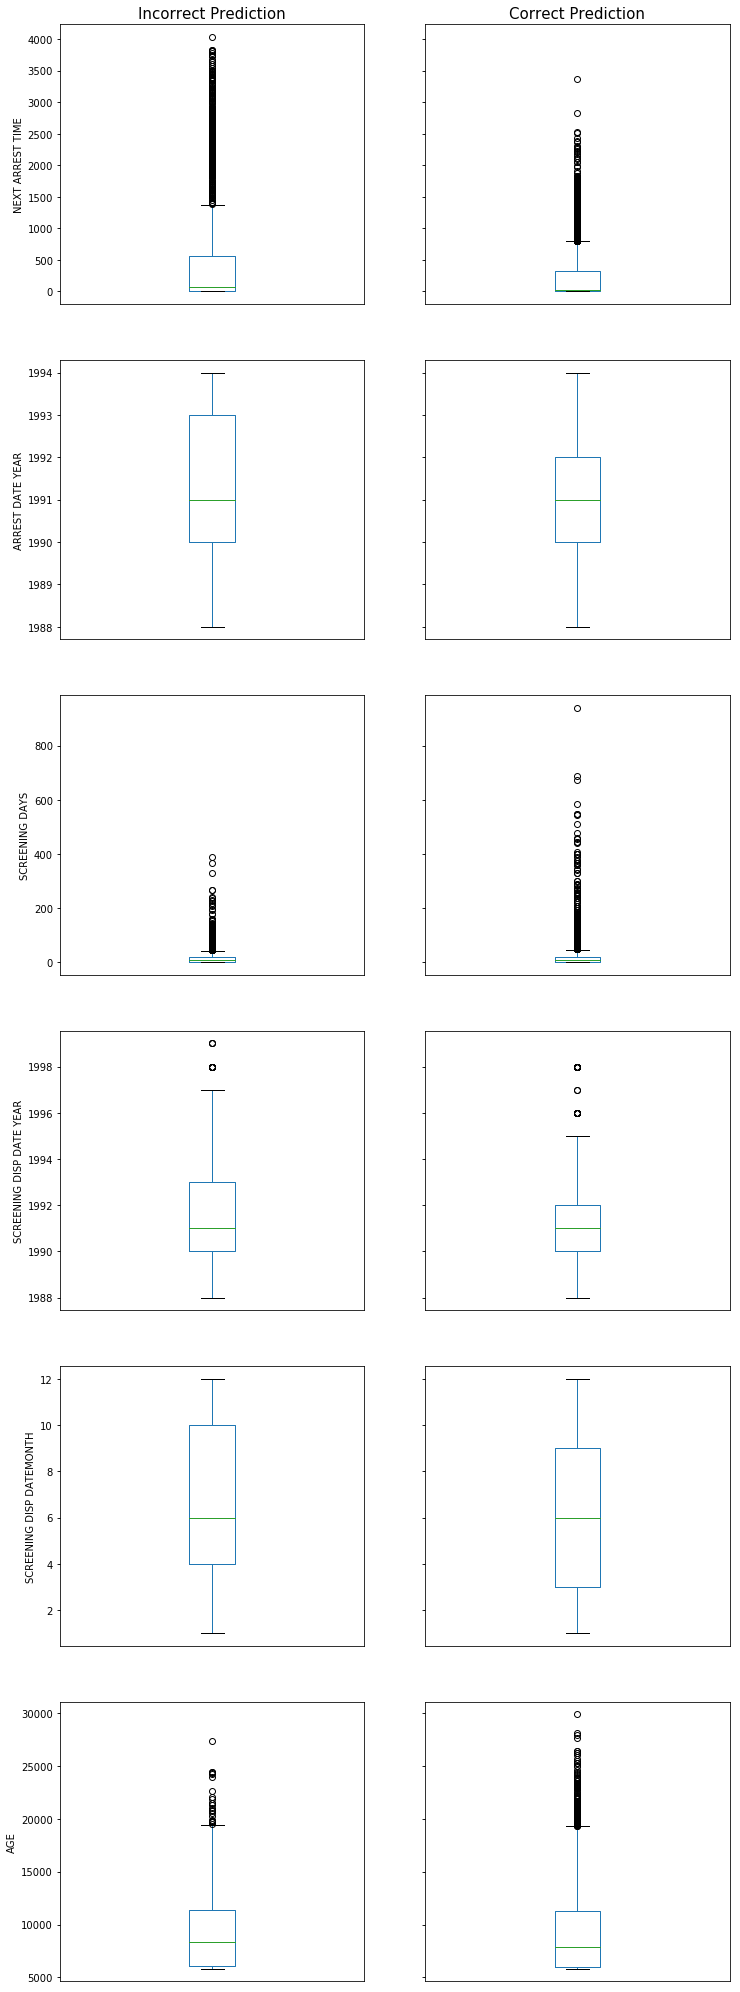

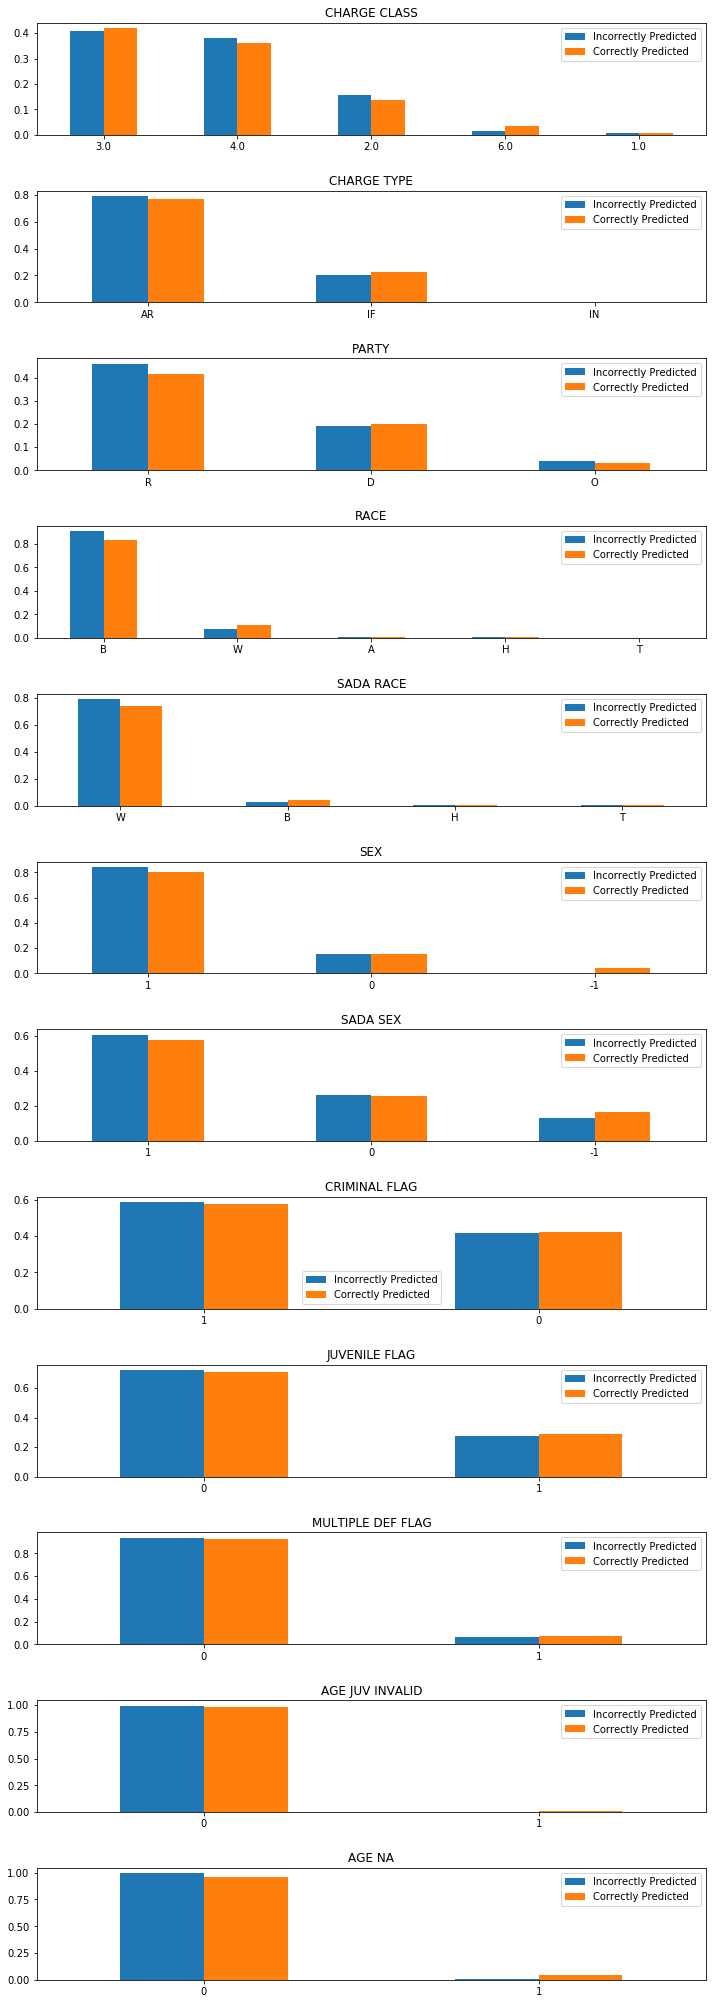

In [44]:
val_error.all_error_analysis(5, numeric_exc_binary, numeric, categorical_and_binary)